Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "nazar-si"

---

# Метод Монте-Карло: расчет погрешности
Вероятно, вы уже сталкивались с концепцией [propagation of uncertainty](https://en.wikipedia.org/wiki/Propagation_of_uncertainty). Идея заключается в том, что по заданным измерениям с погрешностями, мы можем найти неопределенность конечного результата. 
Например, рассмотрим следующее равенство:
$$F = \frac{G M_1 M_2}{r^2}$$
Оно определяет гравитационное взаимодействие между двумя телами массами $M_1$ и $M_2$, расположенными друг от друга на расстоянии r. 
Пусть
    $$M_1 = 40 × 10^4 ± 0.05 × 10^4 kg$$ 
    $$M_2 = 30 × 10^4 ± 0.1 × 10^4 kg$$
    $$r = 3.2 ± 0.01 m$$

Предполагаем, что ошибки измерения описываются Гауссовым распределением, величины стандартных отклонений которых суть наблюдаемые неопределённости $a = \left< a\right>\pm \sigma_a$.

Гравитационная постоянная -- константа.
$$G = 6.67384×10^{−11} m^3 kg^{−1} s^{−2}$$

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

# Задание 1.1
Напишите функцию, определяющую среднее и стандартное отклонение распределения силы с помощью стандартного метода:
https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas

In [25]:
G = 6.67384e-11 
def error(M1, dM1, M2, dM2, r, dr):
    F = G * M1 * M2 / r ** 2
    sigma = ((F / M2 * dM2) ** 2 + (F / M1 * dM1) ** 2 + (2 * F / r * dr) ** 2) ** 0.5
    return F, sigma

In [4]:
print(error(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01))

(0.7820906249999999, 0.005625407272639266)


Теперь давайте попробуем получить то же распределение с помощью метода Монте Карло. Он заключается в многократной генерации случайных входных данных и анализе полученных результатов.
В нашем алгоритм следующий:

1.Генерируем гауссово распределение случайных величин $M_1, M_2$ и $r$ ($10^6$ точек), используя средние значение и стандартные отклонения, указаные выше.
    
2.Для каждой реализации вычисляем силу.

Совет: Не используйте циклы. Чтобы получить $10^6$ случайных точек, используйте библиотеку numpy.

# Задание 1.2 

Напишите функцию, которая моделирует силу методом Монте-Карло и строит нормированную гистограмму.

In [99]:
def Wrapper(M1, dM1, M2, dM2, r, dr, n=10**6, lim = None, out = False, seed = None):
    subdiv = 500

    if (seed):
        np.random.seed(seed)
    aM1 = np.random.normal(M1, dM1, n)
    aM2 = np.random.normal(M2, dM2, n)
    ar = np.random.normal(r, dr, n)

    F = G * aM1 * aM2 / ar ** 2
    if (lim):
        count, bins = np.histogram(F, subdiv, range=lim, density=True)
    else:
        count, bins = np.histogram(F, subdiv, density=True)
    if (out):
        plt.hist(bins[:-1], subdiv, weights= count, color=(0, 0.2, 1, 0.5))
    return bins[0], bins[-1], F.mean(), F.std() 

def MonteCarloNormal(M1, dM1, M2, dM2, r, dr, n=10**6):
    return Wrapper(M1, dM1, M2, dM2, r, dr, n, out=True)
    




# Задание 1.3

Постройте гистограмму распределения силы методом Монте-Карло,вызвав MonteCarloNormal, а также постройте график гауссовой плотности вероятности с параметрами, полученными из error().

Совет: Убедитесь, что вы верно выбрали пределы величины x и оба графика видны. Выберите разумное количество столбиков гистограммы и сравните форму гистограммы и графика.

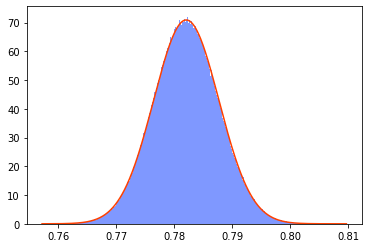

In [100]:
left, right, _, _ = MonteCarloNormal(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01)
F, sigma = error(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01)
x = np.linspace(left, right, 1000)
plt.plot(x, 1 / np.sqrt(2 * np.pi * sigma ** 2)  * np.exp(- (x - F) ** 2 / (2 * sigma ** 2)), color=(1, 0.25, 0))


Сделайте вывод о согласованности двух подходов.

# Задание 2.1
Повторите те же действия для следующих данных:

$$M1=40×10^4±2×10^4kg$$
$$M2=30×10^4±10×10^4kg$$
$$r=3.2±1.0 m$$

и постройте графики.

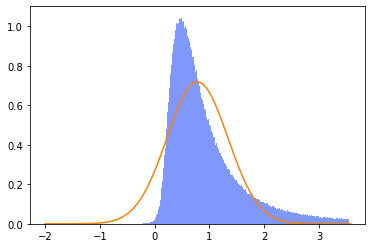

In [104]:
F, sigma = error(40*10**4, 2 * 10**4, 30 * 10**4, 10 * 10**4, 3.2, 1)
_, _, F0, sigma0 = Wrapper(40*10**4, 2 * 10**4, 30 * 10**4, 10 * 10**4, 3.2, 1, 10 ** 6, lim=[F - sigma * 5, F + sigma * 5], out=True)
x = np.linspace(F - sigma * 5, F + sigma * 5, 1000)
plt.plot(x, 1 / np.sqrt(2 * np.pi * sigma ** 2)  * np.exp(- (x - F) ** 2 / (2 * sigma ** 2)), color=(1, 0.5, 0))


# Задание 2.2

Какой метод более точный в этом случае и почему? Как вы думаете, в чем состоят преимущества метода Монте-Карло?

В случае с большими разбросами данных $\delta x \sim x$ метод Монте-Карло точнее, так как он сохраняет математическую зависимость величины от её параметров, в то время, как классический анализ делает лишь квадратичное приближение, которого не достаточно, когда флуктуации величины велики по сравнению со средним значением. 